In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #plotting graphs
import string
import nltk
from nltk.corpus import stopwords#import default stop words


from imblearn.over_sampling import SMOTE #distributes the dataset uniformly 
from sklearn.naive_bayes import MultinomialNB#naive bayes for classification
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score #create confusion matrix
import re#regex for unwanted character removal
from sklearn.model_selection import train_test_split#split dataframe into training, testing part

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer#for vectorization either of them can be used 
#however we are getting only 80 for count but for tfidf it is around 86
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  LinearSVC
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn import datasets, linear_model
%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
#Loading the data
tweets = pd.read_csv("C:/Users/tpvss/Downloads/Tweetsproject.csv")

In [3]:
#printing the first 5 rows of data
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [4]:
#Knowing the no of rows and columns of data
tweets.shape

(14640, 15)

In [5]:
#descirbing the data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
tweets.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791092e+14,0.162830,0.330440,0.745778
min,5.675880e+17,0.335000,0.000000,0.000000
25%,5.685590e+17,0.692300,0.360600,0.000000
50%,5.694780e+17,1.000000,0.670600,0.000000
75%,5.698902e+17,1.000000,1.000000,0.000000
max,5.703110e+17,1.000000,1.000000,44.000000


In [7]:
tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
tweets.isnull().any().describe()

count        15
unique        2
top       False
freq          8
dtype: object

#### Class Distribution

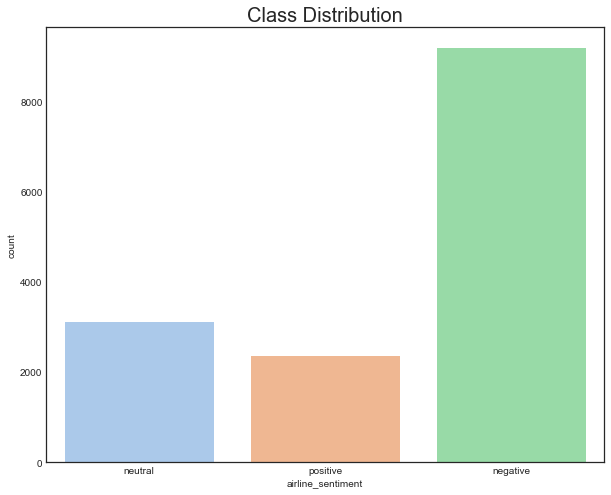

In [9]:

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = tweets, palette = 'pastel')
ax.set_title(label = 'Class Distribution', fontsize = 20)
plt.show()

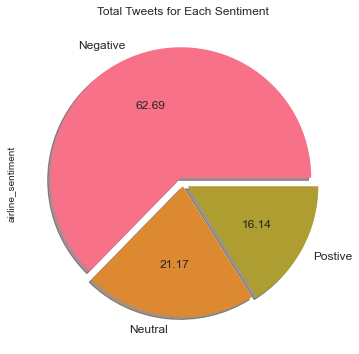

In [10]:
#Information of No of tweets
ax.set_title(label = 'Total number of sentiments of tweets:')
colors=sns.color_palette('husl',10)
pd.Series(tweets['airline_sentiment']).value_counts().plot(kind='pie',colors=colors,labels=['Negative','Neutral','Postive'],explode=[0.05,0.02,0.04],shadow=True,autopct='%.2f',fontsize=12,figsize=(6,6),title="Total Tweets for Each Sentiment")

plt.show()


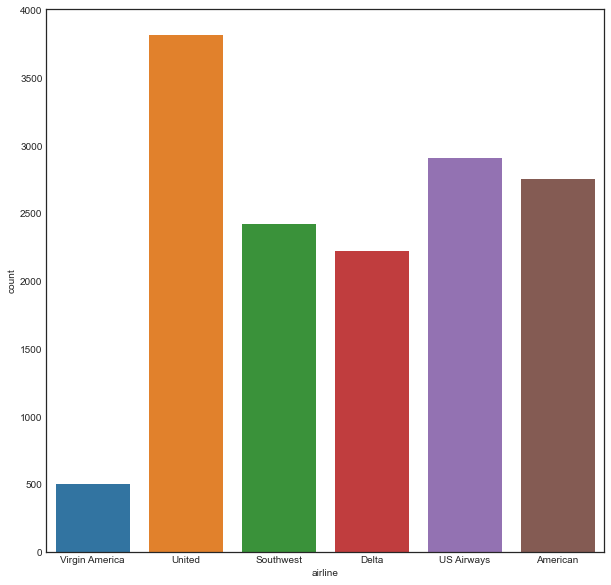

In [11]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x="airline",data=tweets)

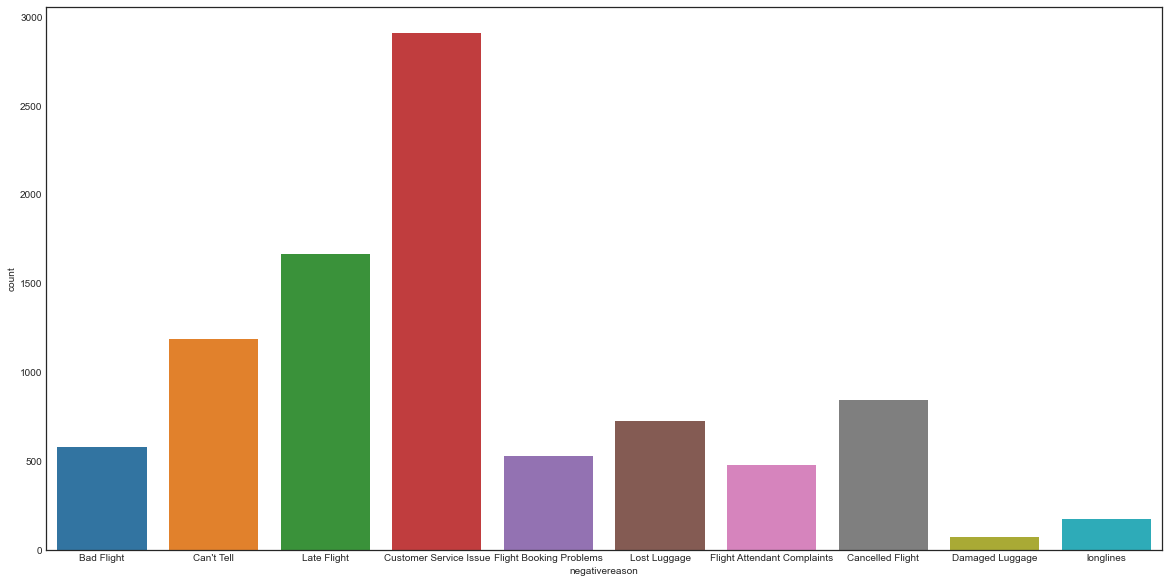

In [12]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x="negativereason",data=tweets)

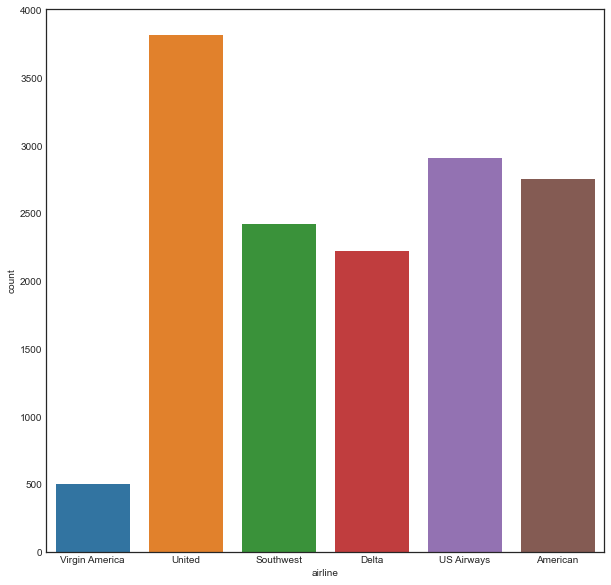

In [13]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=tweets)

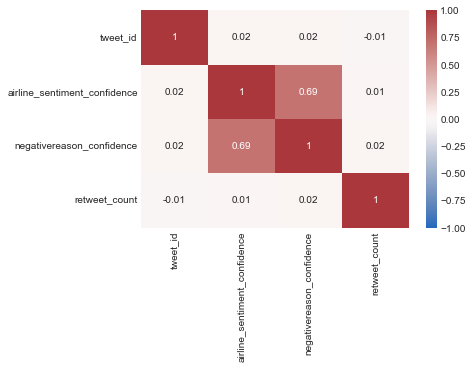

In [14]:
matrix = tweets.corr().round(2)

sns.heatmap(matrix, annot=True,vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

## Preprocessing or Cleaning the data

In [15]:
# convert Sentiments to 0,1,2 because we need numerical format
def convert_Sentiment(sentiment):
      if  sentiment == "positive":
          return 2
      elif sentiment == "neutral":
          return 1
      elif sentiment == "negative":
          return 0

In [16]:
def remove_stopwords(text):
      text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
      return text

  # Remove url of cited stuff
def remove_url(text):
      url = re.compile(r'https?://\S+|www\.\S+')
      return url.sub(r'',text)

  # Remove punctuation basic step
def remove_punctuation(text):
      table = str.maketrans('', '', string.punctuation)
      return text.translate(table)

  # Remove html since most of our tweets attach pic or retweet stuff
def remove_html_tags(text):
      html=re.compile(r'<.*?>')
      return html.sub(r'',text)

  # Remove @username common in every tweet
def remove_twitter_username(text):
      return re.sub('@[^\s]+','',text)

  # Removes emojis from the tweets improves accuracy
def remove_emoji(text):
      emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emojis with faces
                            u"\U0001F300-\U0001F5FF"  # emojis like 100
                            u"\U0001F680-\U0001F6FF"  # map emojis
                            u"\U0001F1E0-\U0001F1FF"  # flags emojis
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            "]+", flags=re.UNICODE)
      return emoji_pattern.sub(r'', text)
  

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tpvss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
#there are many others possible we did most we could find
def abbreviate(text):
      text = re.sub(r"lol", " laughing out loud", text)
      text = re.sub(r"jk", " just kidding", text)
      text = re.sub(r"lmao", " laughing", text)
      text = re.sub(r"won\'t", " will not", text)
      text = re.sub(r"won\'t've", " will not have", text)
      text = re.sub(r"can\'t", " can not", text)
      text = re.sub(r"don\'t", " do not", text)      
      text = re.sub(r"can\'t've", " can not have", text)
      text = re.sub(r"ma\'am", " madam", text)
      text = re.sub(r"let\'s", " let us", text)
      text = re.sub(r"ain\'t", " am not", text)
      text = re.sub(r"shan\'t", " shall not", text)
      text = re.sub(r"sha\n't", " shall not", text)
      text = re.sub(r"o\'clock", " of the clock", text)
      text = re.sub(r"y\'all", " you all", text)
      text = re.sub(r"n\'t", " not", text)
      text = re.sub(r"n\'t've", " not have", text)
      text = re.sub(r"\'re", " are", text)
      text = re.sub(r"\'s", " is", text)
      text = re.sub(r"\'d", " would", text)
      text = re.sub(r"\'d've", " would have", text)
      text = re.sub(r"\'ll", " will", text)
      text = re.sub(r"\'ll've", " will have", text)
      text = re.sub(r"\'t", " not", text)
      text = re.sub(r"\'ve", " have", text)
      text = re.sub(r"\'m", " am", text)
      text = re.sub(r"\'re", " are", text)
      return text  

 # Seperate alphanumeric which are commonly found in twitter language
def remove_numbers(text):
      words = text
      words = re.findall(r"[^\W\d_]+|\d+", words)
      return " ".join(words)

  #remove repeated characters
def continuosly_repeated_char(text):
      tchr = text.group(0) 
      
      if len(tchr) > 1:
          return tchr[0:2] 

def unique_char(rep, text):
      substitute = re.sub(r'(\w)\1+', rep, text)
      return substitute

def char(text):
      substitute = re.sub(r'[^a-zA-Z]',' ',text)
      return substitute


In [19]:
#convert each of the sentiments into numerical values using
#convert sentiment function
tweets['airline_sentiment'] = tweets['airline_sentiment'].apply(lambda x : convert_Sentiment(x))
# combaine negative reason with  tweet (if exsist)
tweets['text'] = tweets['negativereason'].fillna('') + ' ' + tweets['text'] 
tweets['text'] = tweets['text'].apply(lambda x : remove_twitter_username(x))
tweets['text'] = tweets['text'].apply(lambda x : remove_url(x))
tweets['text'] = tweets['text'].apply(lambda x : remove_emoji(x))
tweets['text'] = tweets['text'].apply(lambda x : abbreviate(x))
tweets['text'] = tweets['text'].apply(lambda x : remove_numbers(x))
tweets['text'] = tweets['text'].apply(lambda x : unique_char(continuosly_repeated_char,x))
tweets['text'] = tweets['text'].apply(lambda x : char(x))
tweets['text'] = tweets['text'].apply(lambda x : x.lower())
tweets['text'] = tweets['text'].apply(lambda x : remove_stopwords(x))

In [20]:
tweets.text

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: text, Length: 14640, dtype: object

In [21]:
lasso = linear_model.Lasso()

In [27]:
cv_results = cross_validate(lasso, X_train, y_train, cv=4)
cv_results

{'fit_time': array([0.51415801, 0.72146678, 0.54703736, 0.62108016]),
 'score_time': array([0.        , 0.0023458 , 0.        , 0.01621437]),
 'test_score': array([-4.82789725e-05, -1.04054767e-03, -4.13948946e-04, -2.09411663e-05])}

In [30]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lasso, X_train, y_train, cv=5))

[-6.89705975e-07 -2.75678851e-04 -2.59851991e-06 -2.75239013e-04
 -6.84358800e-07]


### Vectorizing the data


In [24]:
X=tweets['text']
y=tweets['airline_sentiment']
  # Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [25]:
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

### Training and testing the data

In [26]:
  #Our dataset has 70% negative tweets to handle it we are using smote
  #Smote increased our accuracy because it balances our dataset while training the model
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)
  # Split Data into train & test 
  #final acc depends on tested data
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)


### Naiive Bayes

In [31]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_prediction =  nb.predict(X_test)
print(accuracy_score(nb_prediction,y_test))
print(classification_report(y_test,nb_prediction))

0.8679861993826039
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      1827
           1       0.90      0.76      0.82      1795
           2       0.91      0.88      0.89      1885

    accuracy                           0.87      5507
   macro avg       0.87      0.87      0.87      5507
weighted avg       0.87      0.87      0.87      5507



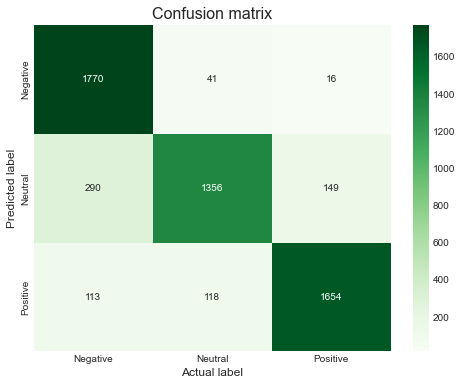

In [32]:
cm = confusion_matrix(y_test,nb_prediction)
  # plot confusion matrix 
  #this is useful feature of nb class 
  #we can know what our model is doing wrong by correlating with matrix
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

### Logistic Regression



In [56]:
lr = LogisticRegression(max_iter=160)
lr.fit(X_train,y_train)
lr_prediction =  lr.predict(X_test)
print(accuracy_score(lr_prediction,y_test))
print(classification_report(y_test,lr_prediction))

0.9012166333757037
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1827
           1       0.82      0.91      0.86      1795
           2       0.93      0.80      0.86      1885

    accuracy                           0.90      5507
   macro avg       0.90      0.90      0.90      5507
weighted avg       0.91      0.90      0.90      5507



In [59]:
lr = LogisticRegression(random_state=0,solver='liblinear',max_iter=160)
lr.fit(X_train,y_train)
lr_prediction =  lr.predict(X_test)
print(accuracy_score(lr_prediction,y_test))
print(classification_report(y_test,lr_prediction))

0.8915925186126747
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1827
           1       0.80      0.91      0.85      1795
           2       0.93      0.78      0.85      1885

    accuracy                           0.89      5507
   macro avg       0.90      0.89      0.89      5507
weighted avg       0.90      0.89      0.89      5507



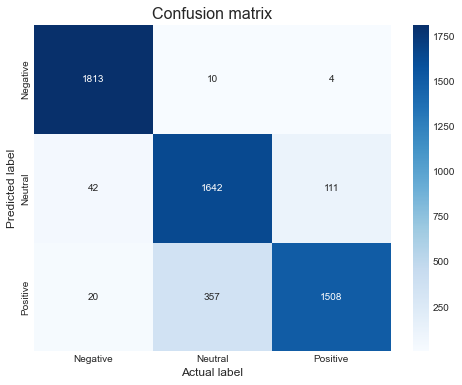

In [34]:
cm = confusion_matrix(y_test,lr_prediction)
  # plot confusion matrix 
  #this is useful feature of lr class 
  #we can know what our model is doing wrong by correlating with matrix
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

### K-Nearest Neighbour

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_prediction =  knn.predict(X_test)
print(accuracy_score(knn_prediction,y_test))
print(classification_report(y_test,knn_prediction))
  


0.6466315598329399
              precision    recall  f1-score   support

           0       0.99      0.11      0.20      1827
           1       0.55      0.92      0.69      1795
           2       0.73      0.91      0.81      1885

    accuracy                           0.65      5507
   macro avg       0.76      0.65      0.57      5507
weighted avg       0.76      0.65      0.57      5507



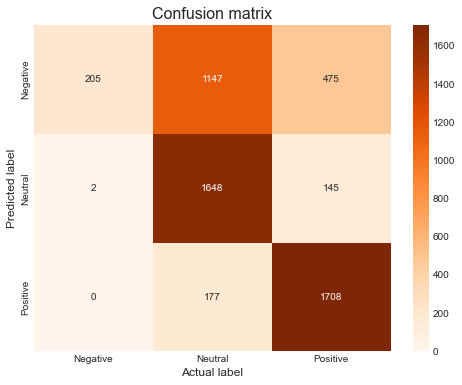

In [36]:
cm = confusion_matrix(y_test,knn_prediction)
  # plot confusion matrix 
  #this is useful feature of lr class 
  #we can know what our model is doing wrong by correlating with matrix
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Oranges, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Accuracy: 0.6466315598329399


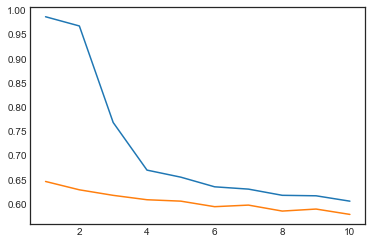

In [37]:
train_scores = []
test_score = []
for i in range(1,11):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)
  train_scores.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test,y_test))
  
plt.plot(list(range(1,11)),train_scores)
plt.plot(list(range(1,11)),test_score)

print("Accuracy:",max(test_score))

### Decision Tress

In [38]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_prediction =  dt.predict(X_test)
print(accuracy_score(dt_prediction,y_test))
print(classification_report(y_test,dt_prediction))
 

0.9442527692028327
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1827
           1       0.91      0.93      0.92      1795
           2       0.93      0.92      0.93      1885

    accuracy                           0.94      5507
   macro avg       0.94      0.94      0.94      5507
weighted avg       0.94      0.94      0.94      5507



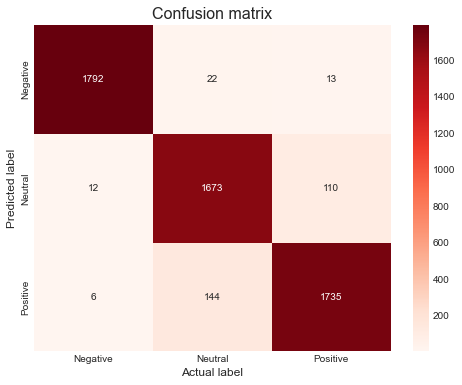

In [39]:
cm = confusion_matrix(y_test,dt_prediction)
  
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

### Random Forest

In [40]:
rfc =RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_prediction =  rfc.predict(X_test)
rfc_predictiontrain =  rfc.predict(X_train)
print(accuracy_score(rfc_prediction,y_test))
print(classification_report(y_test,rfc_prediction))


0.9607771926638823
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1827
           1       0.94      0.95      0.94      1795
           2       0.96      0.94      0.95      1885

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507



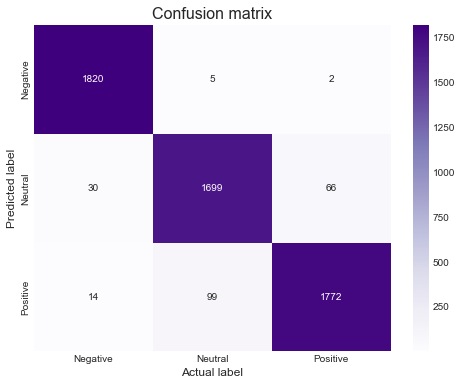

In [41]:
cm = confusion_matrix(y_test,rfc_prediction)
  
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Purples, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

0.8997639368076993


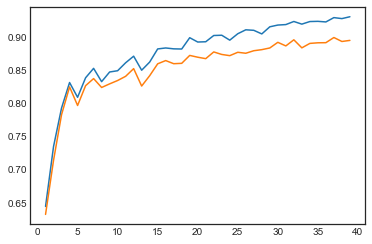

In [44]:
train_scores = []
test_score = []
for i in range(1,40):
    forest_model = RandomForestClassifier(max_depth= i)
    forest_model.fit(X_train,y_train)
    train_scores.append(forest_model.score(X_train,y_train))
    test_score.append(forest_model.score(X_test,y_test))

plt.plot(list(range(1,40)),train_scores)
plt.plot(list(range(1,40)),test_score)

print(max(test_score))

### SVM

In [45]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
svc_prediction = SVCmodel.predict(X_test)
print(accuracy_score(svc_prediction,y_test))
print(classification_report(y_test,svc_prediction))

0.9242781913927728
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1827
           1       0.85      0.94      0.89      1795
           2       0.94      0.84      0.89      1885

    accuracy                           0.92      5507
   macro avg       0.93      0.93      0.92      5507
weighted avg       0.93      0.92      0.92      5507



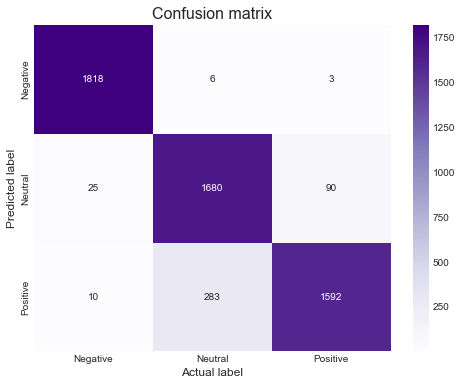

In [46]:
cm = confusion_matrix(y_test,svc_prediction)
  # plot confusion matrix 
  #this is useful feature of nb class 
  #we can know what our model is doing wrong by correlating with matrix
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Purples, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

### Neural Network

In [60]:
nn = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter = 300,activation = 'relu',solver = 'adam')
nn.fit(X_train,y_train)
nn_prediction =  nn.predict(X_test)
print(accuracy_score(nn_prediction,y_test))
print(classification_report(y_test,nn_prediction))
  

  


0.9645905211548937
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1827
           1       0.97      0.93      0.95      1795
           2       0.94      0.98      0.96      1885

    accuracy                           0.96      5507
   macro avg       0.97      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507



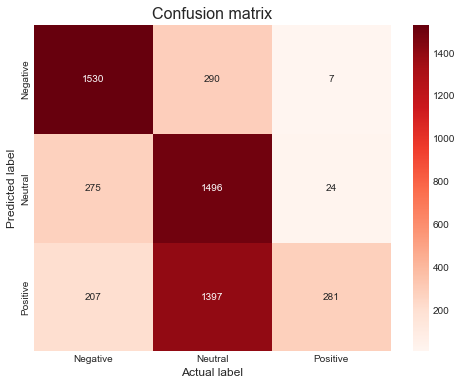

In [48]:
cm = confusion_matrix(y_test,nn_prediction)
  
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()